In [111]:
import pandas as pd
import numpy as np
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [112]:
# Reading data
X_train = pd.read_csv('layoffs.csv')
df = X_train.copy()
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Lemon,Buenos Aires,Crypto,NaN,0.38,2022-11-24,Series A,Argentina,17.0
1,Assure,Salt Lake City,Finance,NaN,1.00,2022-11-23,Seed,United States,2.0
2,GoodGood,Toronto,Retail,NaN,1.00,2022-11-23,Seed,Canada,6.0
3,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0
4,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0


In [113]:
df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         486
percentage_laid_off    550
date                     0
stage                    4
country                  0
funds_raised           116
dtype: int64

In [114]:
df.total_laid_off = df.total_laid_off.fillna(0)
df.industry = df.industry.fillna(0)
df.stage = df.stage.fillna(0)
df.funds_raised = df.funds_raised.fillna(0)
df.percentage_laid_off = df.percentage_laid_off.fillna(0)


In [115]:
df.isna().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

<AxesSubplot: xlabel='industry', ylabel='total laid off'>

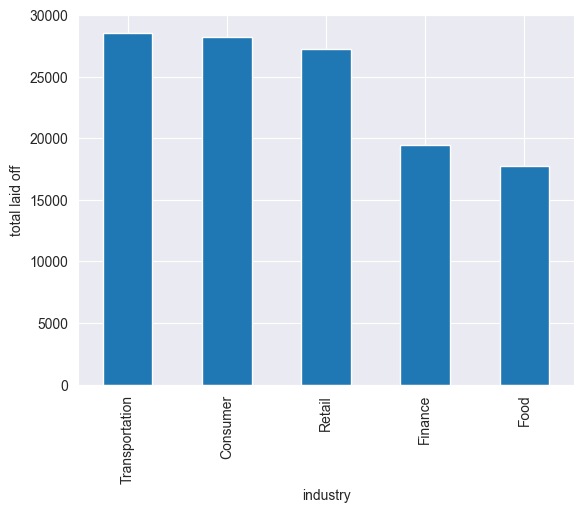

In [116]:
# top 5 total laid off in bar chart by industry
df.head()
df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="total laid off", kind='bar')

<AxesSubplot: xlabel='company', ylabel='total laid off'>

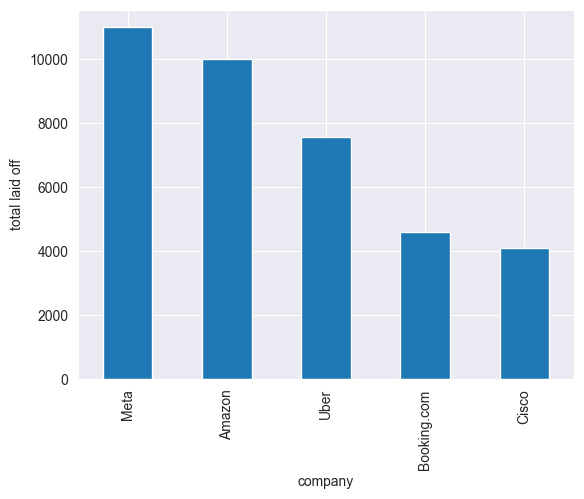

In [117]:
# top 5 total laid off by company
df.head()
df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="total laid off", kind='bar')

<AxesSubplot: xlabel='location', ylabel='total laid off'>

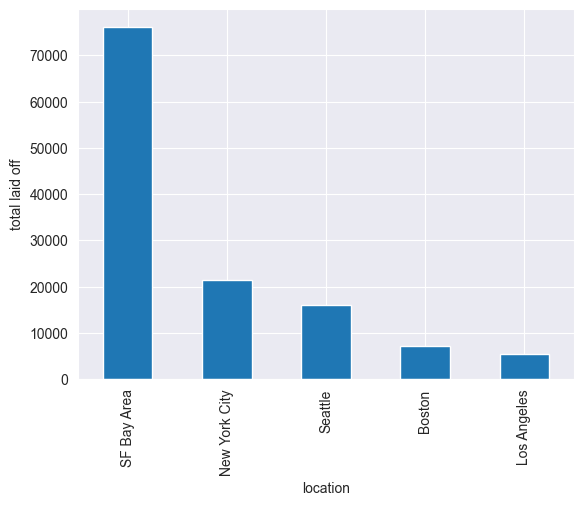

In [118]:
# Top 5 US layoffs by city
df.head()
df[(df['country'] == 'United States')].groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="total laid off", kind='bar')


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Lemon,Buenos Aires,Crypto,0.0,0.38,2022-11-24,Series A,Argentina,17.0
1,Assure,Salt Lake City,Finance,0.0,1.00,2022-11-23,Seed,United States,2.0
2,GoodGood,Toronto,Retail,0.0,1.00,2022-11-23,Seed,Canada,6.0
3,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0
4,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0


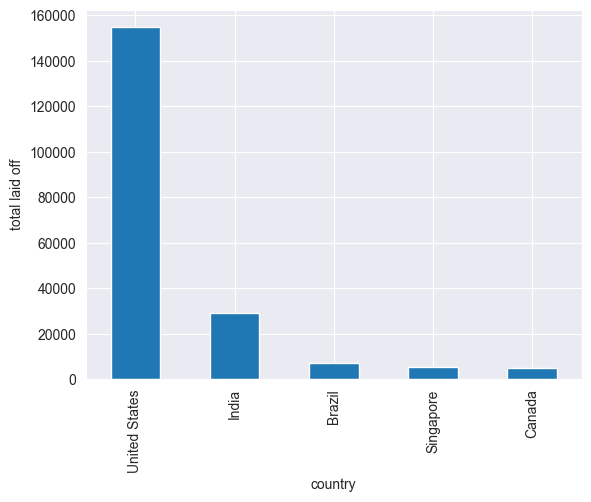

In [120]:
#layoffs by country
df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="total laid off", kind='bar')
df.head()

<AxesSubplot: xlabel='Year', ylabel='total laid off'>

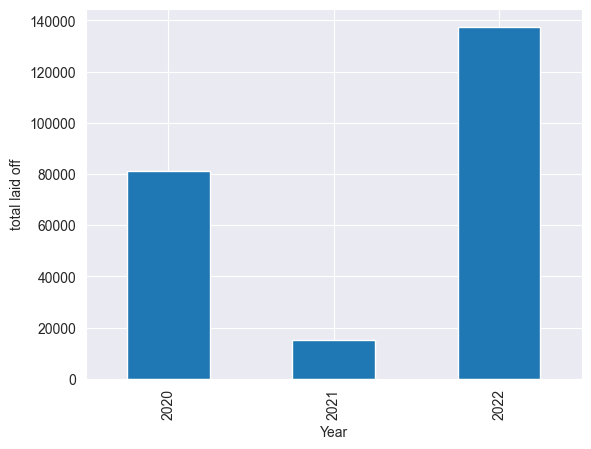

In [124]:
# Layoffs by year

df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.strftime('%Y')
df.head()
df.groupby('Year')['total_laid_off'].sum().plot(ylabel="total laid off", kind='bar')

<AxesSubplot: xlabel='industry', ylabel='percentage_laid_off'>

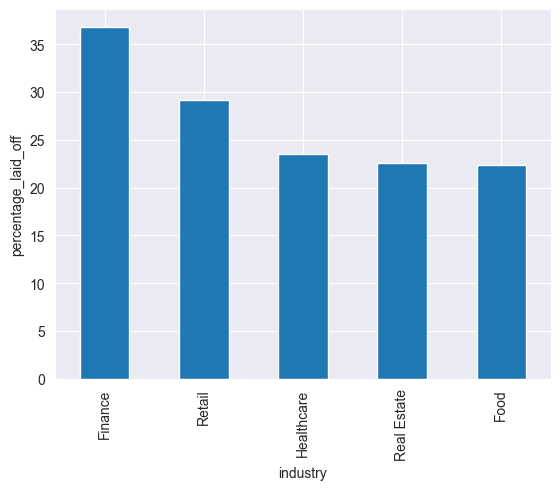

In [128]:
# percentage laid off x industry
df.groupby('industry')['percentage_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="percentage_laid_off", kind='bar')

In [55]:

## Decision tree
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [56]:
# funds raised to percentage_laid_off
# Linear Regression Machine Learning

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv('layoffs.csv')
df_binary = df[['funds_raised', 'total_laid_off']].dropna()
df_binary.head()

,funds_raised,total_laid_off
3,92.0,160.0
4,1000.0,80.0
6,804.0,93.0
8,914.0,100.0
9,1600.0,1500.0


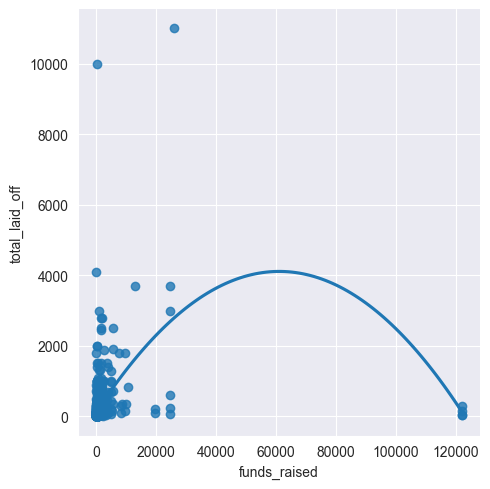

In [90]:
sns.lmplot(x ="funds_raised", y ="total_laid_off", data = df_binary, order = 2, ci = None)


In [91]:
df_binary.fillna(method ='ffill', inplace = True)

In [92]:
X = np.array(df_binary['funds_raised']).reshape(-1, 1)
y = np.array(df_binary['total_laid_off']).reshape(-1, 1)

df_binary.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

-0.0038504164443111666


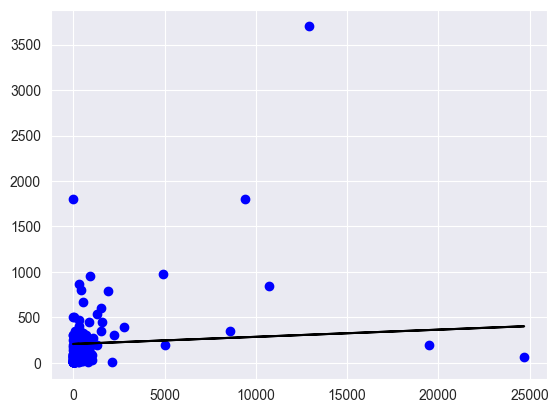

In [93]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

/var/folders/yc/033ng22x3_14htnw_rjy51540000gn/T/ipykernel_8210/225997283.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.10)
/var/folders/yc/033ng22x3_14htnw_rjy51540000gn/T/ipykernel_8210/225997283.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.90)
/var/folders/yc/033ng22x3_14htnw_rjy51540000gn/T/ipykernel_8210/225997283.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.

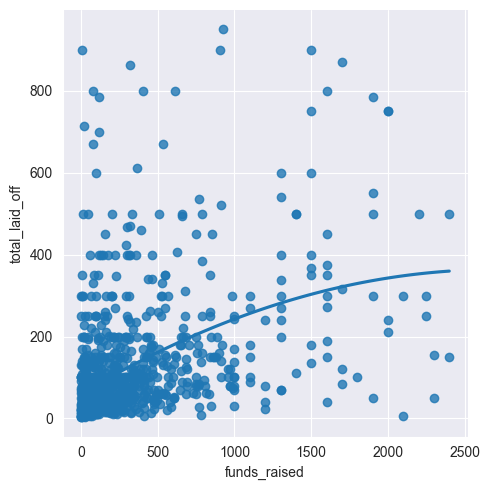

In [94]:
#With Outliers Removed

Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

sns.lmplot(x ="funds_raised", y ="total_laid_off", data = df,
                               order = 2, ci = None)

In [99]:
# I chose inner merge because I do not want any NaN entries in my merged df
netflix = pd.read_csv('netflix.csv')
layoffs = pd.read_csv('layoffs.csv')
layoffs = layoffs.groupby('country')['total_laid_off'].sum()
pd.merge(netflix, layoffs, left_on="Country", right_on="country")[['Country', 'total_laid_off', 'Cost Per Month - Basic ($)']]


,Country,total_laid_off,Cost Per Month - Basic ($)
0,Argentina,130.0,3.74
1,Austria,470.0,9.03
2,Bulgaria,120.0,9.03
3,Chile,30.0,7.07
4,Colombia,30.0,4.31
5,Estonia,267.0,9.03
6,France,0.0,10.16
7,Germany,3588.0,9.03
8,Greece,0.0,9.03
9,Hong Kong,730.0,8.08
